# Installing Dependencies

In [ ]:
pip install pydub

In [ ]:
pip install textgrid

In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read and Understand File

In [ ]:
import pandas as pd

# Load the Parquet file
file_path = '/content/drive/MyDrive/MT_speech/train-00000-of-00804.parquet'
data = pd.read_parquet(file_path)

# Display dataset information and the first few rows
print(data.info())
print(data.head())

# Example to process audio if it's stored in binary format (assuming each row has audio data)
import librosa
import io
import numpy as np

def process_audio(row):
    # Convert raw bytes to a waveform if stored in bytes
    audio_bytes = row['audio_column_name']  # replace 'audio_column_name' with actual column name
    audio_data, sr = librosa.load(io.BytesIO(audio_bytes), sr=None)
    return audio_data, sr

# Apply this to a sample row if necessary
# audio_data, sample_rate = process_audio(data.iloc[0])
# print("Sample rate:", sample_rate)
# print("Audio data:", audio_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1868 non-null   object
 1   audio        1868 non-null   object
 2   duration_ms  1868 non-null   int32 
 3   text         1868 non-null   object
dtypes: int32(1), object(3)
memory usage: 51.2+ KB
None
                                                  id  \
0  07282016HFUUforum_SLASH_07-28-2016_HFUUforum_D...   
1  07282016HFUUforum_SLASH_07-28-2016_HFUUforum_D...   
2  07282016HFUUforum_SLASH_07-28-2016_HFUUforum_D...   
3  07282016HFUUforum_SLASH_07-28-2016_HFUUforum_D...   
4  07282016HFUUforum_SLASH_07-28-2016_HFUUforum_D...   

                                               audio  duration_ms  \
0  {'bytes': b'fLaC\x00\x00\x00"\x04\x80\x04\x80\...        14920   
1  {'bytes': b'fLaC\x00\x00\x00"\x04\x80\x04\x80\...        14530   
2  {'bytes': b'fLaC\x00\x00\x00"\x04\x80\x04\x80

In [ ]:
data.columns

Index(['id', 'audio', 'duration_ms', 'text'], dtype='object')

In [ ]:
x=list(data["audio"][0].values())[0]
import io
import soundfile as sf
from IPython.display import Audio

# Extract the FLAC audio bytes
audio_bytes = x

# Load the audio file and play it
with io.BytesIO(audio_bytes) as audio_file:
    audio_data, sample_rate = sf.read(audio_file)


# Play the audio


# Convert Data into a Better Format

In [ ]:
from pydub import AudioSegment
import io

# Load FLAC audio and convert it to WAV format
def convert_flac_to_wav(audio_bytes):
    flac_audio = AudioSegment.from_file(io.BytesIO(audio_bytes), format="flac")
    wav_audio = io.BytesIO()
    flac_audio.export(wav_audio, format="wav")
    wav_audio.seek(0)  # Rewind the buffer to the beginning
    return wav_audio

# Usage example
audio_bytes = x  # Replace with correct data extraction if needed
wav_audio = convert_flac_to_wav(audio_bytes)
print(wav_audio.read())


b'RIFF$I\x07\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x80>\x00\x00\x00}\x00\x00\x02\x00\x10\x00data\x00I\x07\x00/\x12e\x1a\xc1"\x1a$m\x1c\xb7\x12\xff\x0cH\x08|\xfe\xe2\xf1\xfd\xeb;\xf0l\xf7\xc8\xf9<\xf7\x15\xf5\xfc\xf6B\xfcT\x01\x98\x02\xf7\xff`\xfd\x0e\xff\xfa\x03\x15\x07\xc2\x05F\x02\x10\x00\xa4\xff]\xff\xd5\xfd\x86\xfb\x17\xfam\xfa\x9d\xfbj\xfb\xc3\xf9\xe9\xf9\x0f\xfe\\\x03\xb0\x05R\x05B\x05\xfb\x05\x12\x05\xff\x00\xee\xfb\xc1\xf8\x8d\xf7\xff\xf6^\xf7\xd0\xf9v\xfe5\x04U\td\x0cJ\r\xf0\x0c\xa4\x0b\xc6\x08Y\x04\xf9\xff-\xfd.\xfc\x8d\xfb\xb4\xfab\xfa\xc5\xfa@\xfb*\xfbr\xfaS\xfa\xeb\xfbl\xfe&\x016\x03#\x05\xca\x07\x83\nX\x0bF\tS\x05 \x01\xd0\xfd[\xfb\x1f\xf9 \xf7`\xf5S\xf4\xe9\xf4\xf1\xf6?\xf93\xfb\x1a\xfc\x92\xfb?\xfb~\xfc\x89\xfe6\x00f\x00#\xff=\xfeQ\xffM\x02\x1a\x06\xde\x08\xda\x07\xf0\x02\x1a\xfd\xd6\xf9\x92\xfa\x90\xfd\xe8\xff\x03\x02\xa6\x05\xf1\t\x18\r%\x0e\xa2\r\xe6\x0c{\x0b\xad\x07u\x02\xd8\xfe]\xfe\xcf\xff\x87\x00\xd8\xfe\x1a\xfc\xef\xfa\x14\xfc\x0c\xfe!\xfeA\xfb6\xf7\xfc\xf

In [ ]:
import pandas as pd
import io
from pydub import AudioSegment
import librosa
from IPython.display import Audio

# Function to convert FLAC to WAV
def convert_flac_to_wav(audio_bytes):
    flac_audio = AudioSegment.from_file(io.BytesIO(audio_bytes), format="flac")
    wav_audio = io.BytesIO()
    flac_audio.export(wav_audio, format="wav")
    wav_audio.seek(0)
    return wav_audio

# Save each converted WAV file and store the path
with open("/content/drive/MyDrive/MT_speech/Audio_path.txt", "w") as f:
    count = 0
    for i in data["audio"]:
        # Extract audio bytes
        audio_bytes = list(i.values())[0]

        # Convert FLAC to WAV and save to file
        wav_audio = convert_flac_to_wav(audio_bytes)
        wav_path = f"/content/drive/MyDrive/MT_speech/Wav_files/audio_{count}.wav"

        # Write WAV file to disk
        with open(wav_path, "wb") as wav_file:
            wav_file.write(wav_audio.getbuffer())

        # Write the file path to text file
        f.write(f"{wav_path}\n")
        count += 1


KeyboardInterrupt: 

In [ ]:
print(count)

In [ ]:
with open("/content/drive/MyDrive/MT_speech/text","w") as f:
  count=0
  for i in data["text"]:
    text=i
    f.write(f"{text}\n")

    count+=1

In [ ]:
with open("/content/drive/MyDrive/MT_speech/id","w") as f:
  count=0
  for i in data["id"]:
    id=i
    f.write(f"{id}\n")

    count+=1


# Creating CSV for data to work with

In [ ]:
import csv
csv_file_path = '/content/drive/MyDrive/MT_speech/data.csv'


with open(csv_file_path, 'w', newline='') as csvfile:

    csv_writer = csv.writer(csvfile)


    csv_writer.writerow(['Audio_path', 'text','id'])

with open("/content/drive/MyDrive/MT_speech/Audio_path.txt","r") as f:
  audios=f.readlines()
with open("/content/drive/MyDrive/MT_speech/text","r") as f1:
  texts=f1.readlines()
with open("/content/drive/MyDrive/MT_speech/id","r") as f2:
  ids=f2.readlines()

with open(csv_file_path, 'a', newline='') as csvfile:
      for a,t,i in zip(audios,texts,ids):
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow([a.strip(), t.strip(),i.strip()])



#Data Preprocessing


In [ ]:
import librosa
def check_sampling_rate_librosa(file_path):
    # Load the audio file without resampling
    _, sample_rate = librosa.load(file_path, sr=None, duration=5.0)  # Load only the first 5 seconds
    return sample_rate
df=pd.read_csv("/content/drive/MyDrive/MT_speech/data.csv")
sample_rate=[]
for i in df["Audio_path"]:
  sample_rate.append(check_sampling_rate_librosa(i))



<ipython-input-39-b84ea0ad9010>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  _, sample_rate = librosa.load(file_path, sr=None, duration=5.0)  # Load only the first 5 seconds
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


EOFError: 

Check variety of sample rate

In [ ]:
dict_sample_rate={}
for i in sample_rate:
  if i not in dict_sample_rate:
    dict_sample_rate[i]=1
  else:
    dict_sample_rate[i]+=1
dict_sample_rate


We won't be changing the sample rate as the freq of humans speech is 8khz so 16000 is a perfect sample rate to work with.

Remove any audio that has non human audio; Previewing the spectogram for audio files

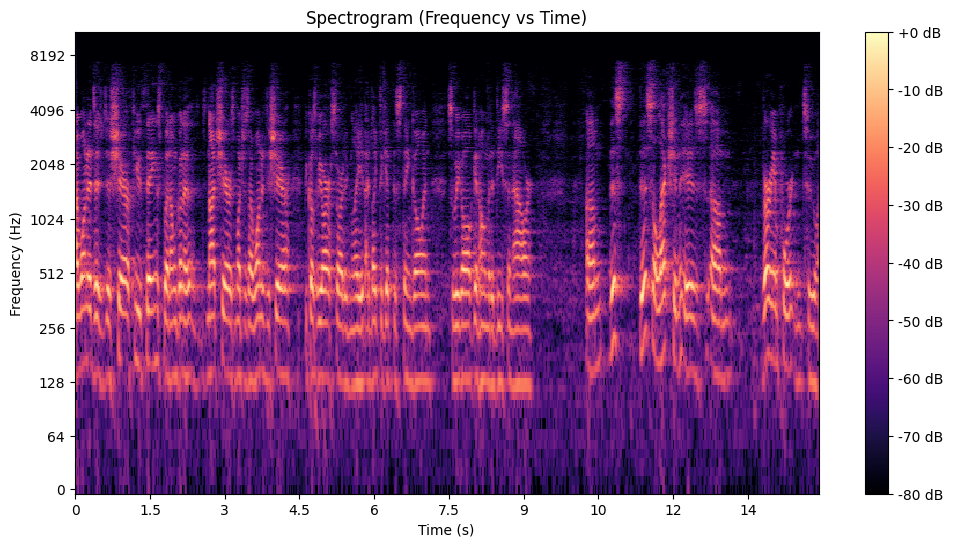

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
df=pd.read_csv("/content/drive/MyDrive/MT_speech/data.csv")
file_path = df["Audio_path"][0]
audio, sr = librosa.load(file_path)


stft = librosa.stft(audio)
stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)


plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (Frequency vs Time)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()


# Clinical Notes Data

#Preprocess Data

In [ ]:
import csv
csv_file_path = '/content/drive/MyDrive/MT_speech/primock57-main/Transcripts_csv/data_day1.csv'


with open(csv_file_path, 'w', newline='') as csvfile:

    csv_writer = csv.writer(csvfile)


    csv_writer.writerow(['Interval', 'xmin','xmax', 'text'])



In [ ]:
import glob
import os

folder_path = "/content/drive/MyDrive/MT_speech/primock57-main/transcripts"

# List all files in the folder
file_names = [f for f in glob.glob(f"{folder_path}/*") if os.path.isfile(f)]

file_names[0]

In [ ]:
from textgrid import TextGrid
for fname in file_names:
  if ".md" in fname:# skip readme files
    continue

  tg = TextGrid.fromFile(fname)
  fname=fname.split("/")
  fname=fname[-1]
  fname=fname.replace(".TextGrid",".csv")

  csv_file_path = "/content/drive/MyDrive/MT_speech/primock57-main/Transcripts_csv/"+fname
  with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Interval', 'xmin','xmax', 'text'])
    for tier in tg.tiers:
        count=0
        for interval in tier.intervals:
            count+=1
            csv_writer.writerow([count,interval.minTime, interval.maxTime,interval.mark])




# Removing audio intervals which have no sound

Create duplicate audio files

In [ ]:
import shutil
import os

source_folder = "/content/drive/MyDrive/MT_speech/primock57-main/audio"
destination_folder = "/content/drive/MyDrive/MT_speech/primock57-main/audio_altered"

# List all files in the source folder
for filename in os.listdir(source_folder):
    source_file = os.path.join(source_folder, filename)
    # Only proceed if it is a file
    if os.path.isfile(source_file):
        # Copy each file to the destination folder
        shutil.copy(source_file, destination_folder)



In [ ]:
import glob
import os

folder_path = "/content/drive/MyDrive/MT_speech/primock57-main/Transcripts_csv"

# List all files in the folder
file_names = [f for f in glob.glob(f"{folder_path}/*") if os.path.isfile(f)]

file_names[0]

Shorten the copied audio files based on text

In [ ]:
import pandas as pd
dict_file_names={}
for fname in file_names:
  df_transcripts=pd.read_csv(fname)
  for start,end,text in zip(df_transcripts["xmin"],df_transcripts["xmax"],df_transcripts["text"]):
    if str(text)=="nan":
      if fname not in dict_file_names:
        dict_file_names[fname]=[(start*1000,end*1000)]# in mili seconds so multiply
      else:
        dict_file_names[fname].append((start*1000,end*1000))

In [ ]:
import glob
import os

folder_path = "/content/primock57/audio"

# List all files in the folder
file_names1 = [f for f in glob.glob(f"{folder_path}/*") if os.path.isfile(f)]

file_names[0]

In [ ]:
from pydub import AudioSegment
import os



for fname in file_names1:
  if ".md" in fname:
    continue
# Load the audio file
  print(fname)
  audio = AudioSegment.from_wav(fname)
  fname=fname.split("/")
  fname=fname[-1]


  # Convert audio sample rate with ffmpeg

  csv_name=fname.replace(".wav",".csv")
  # Load intervals to remove
  intervals_to_remove = dict_file_names["/content/drive/MyDrive/MT_speech/primock57-main/Transcripts_csv/"+csv_name]

  # Initialize the modified audio with the segment before the first interval
  output_audio = audio[:intervals_to_remove[0][0]]

  # Loop through intervals to create modified audio
  for i, (start, end) in enumerate(intervals_to_remove):
      if i < len(intervals_to_remove) - 1:
          next_start = intervals_to_remove[i + 1][0]
          output_audio += audio[end:next_start]  # Add segment after the interval
      else:
          output_audio += audio[end:]  # Add remaining audio after last interval

  # Export the modified audio
  output_audio.export("/content/drive/MyDrive/MT_speech/primock57-main/Denoised/"+fname, format="wav")



#Load MODEL

In [ ]:
!pip install --upgrade pip
!pip install --upgrade transformers datasets[audio] accelerate


In [ ]:
# Load model directly
from transformers import AutoProcessor, AutoModelForSpeechSeq2Seq

processor = AutoProcessor.from_pretrained("openai/whisper-small")
model = AutoModelForSpeechSeq2Seq.from_pretrained("openai/whisper-small")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

In [ ]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

import librosa

# load model and processor
processor = WhisperProcessor.from_pretrained("openai/whisper-small")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")
model.config.forced_decoder_ids = None


# Load audio file
audio_array, sample_rate = librosa.load("/content/drive/MyDrive/MT_speech/primock57-main/Denoised/day1_consultation01_doctor.wav", sr=16000)  # Whisper uses 16kHz sampling rate

# Process the audio array
input_features = processor(audio_array, sampling_rate=sample_rate, return_tensors="pt").input_features
# generate token ids
predicted_ids = model.generate(input_features)
# decode token ids to text
transcription = processor.batch_decode(predicted_ids, skip_special_tokens=False)



In [ ]:
print(transcription)

["<|startoftranscript|><|en|><|transcribe|><|notimestamps|> Hello Hi, um, should we stop yeah, okay. Hey, um, good morning, sir. How can I help you this morning? Yeah, I'm sorry to hear that and and when you say diarrhea, what do you mean by diarrhea? Do you mean you're going to the toilet more often or are your stools more loose? Okay, and how many times a day are you going let's say a last couple of days six seven times a day and you mentioned is mainly watery Have you noticed any other things like blood in your stools?"]


# Open AI whisper Limit 30 seconds so trimming the audio files and generating transcript files

In [ ]:
import os
import pandas as pd
import math
import re

# Define the folder path
folder_path = "/content/drive/MyDrive/MT_speech/primock57-main/Transcripts_csv"
rem_words=[]
# Iterate through all files in the folder
import numpy as np
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if ".csv" in file_path:
      file_=pd.read_csv(file_path)
      text=file_["text"]
      for sec in text:
          sec=str(sec)
          matches = re.findall(r'<(.*?)>', sec)
          for match in matches:
              if "<"+match+">" not in rem_words:
                rem_words.append("<"+match+">")
print(len(rem_words),rem_words)



4 ['<UNSURE>', '</UNSURE>', '<INAUDIBLE_SPEECH/>', '<UNIN/>']


Need to text files less than 30 seconds, Open AI has a limit of 30 seconds.

In [ ]:
folder_path = "/content/drive/MyDrive/MT_speech/primock57-main/Transcripts_csv"
# Iterate through all files in the folder
import numpy as np
dict_file_duration={}
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if ".csv" not in file_name:
      continue
    file_=pd.read_csv(file_path)
    dict_file_duration[file_name]=[]
    for index, row in file_.iterrows():
      i=str(row["text"])
      if "nan" not in i:
        duration=row["xmax"]-row["xmin"]
        dict_file_duration[file_name].append(duration)









In [ ]:
time_stamps={}
for file in dict_file_duration.keys():
  time_stamps[file]=[]
  sum=0
  for duration in dict_file_duration[file]:
    if sum+ duration>30:
      time_stamps[file].append(sum)


      sum=0
    sum+=duration
  time_stamps[file].append(sum)

In [ ]:
for file in dict_file_duration.keys():

  for i in range(1,len(time_stamps[file])):
    time_stamps[file][i]=time_stamps[file][i]+time_stamps[file][i-1]

  time_stamps[file]

In [ ]:
import os

# Define the folder paths
source_folder = "/content/drive/MyDrive/MT_speech/primock57-main/Transcripts_csv"
destination_folder = "/content/drive/MyDrive/MT_speech/primock57-main/Chunks_audio"

# Check if the source folder exists
if os.path.exists(source_folder):
    print(f"The source folder exists: {source_folder}")

    # List all files in the source folder
    files = os.listdir(source_folder)
    print(f"Files in the source folder: {files}")

    # Filter out only CSV files
    csv_files = [file for file in files if file.endswith(".csv")]
    print(f"CSV files found: {csv_files}")

    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)
    print(f"Destination folder created: {destination_folder}")

    # Create folders for each CSV file
    for csv_file in csv_files:
        folder_name = os.path.splitext(csv_file)[0]  # Folder name is the CSV name without extension
        folder_path = os.path.join(destination_folder, folder_name)
        os.makedirs(folder_path, exist_ok=True)
        print(f"Created folder: {folder_path}")
else:
    print(f"The source folder does not exist: {source_folder}")


In [ ]:
from pydub import AudioSegment
import os
for file in dict_file_duration.keys():
  file_name=file.replace(".csv",".wav")
  file=file.replace(".wav","")
  file_=file.replace(".csv","")
  input_file = "/content/drive/MyDrive/MT_speech/primock57-main/Denoised/" + file_name
  output_folder = "/content/drive/MyDrive/MT_speech/primock57-main/Chunks_audio/"+ file_+"/"

  # Load the audio file
  audio = AudioSegment.from_wav(input_file)
  # Calculate the number of chunks needed
  total_length = len(audio)
  times=time_stamps[file]
  print(file)
  start_time=0
  for i in range(len(times)):
      end_time = times[i]*1000
      chunk = audio[start_time:end_time]
      print(start_time,end_time)
      start_time = end_time
      # Construct filename for each chunk
      chunk_name = f"chunk_{i + 1}.wav"
      chunk_path = os.path.join(output_folder, chunk_name)
      # Export the chunk as a new wav file
      chunk.export(chunk_path, format="wav")
      print(f"Exported {chunk_name}")

  print("All chunks have been exported.")


In [ ]:
import nltk
import os
import librosa
from transformers import WhisperProcessor, WhisperForConditionalGeneration
import pandas as pd

# Load the processor and model
processor = WhisperProcessor.from_pretrained("openai/whisper-small")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")
model.config.forced_decoder_ids = processor.get_decoder_prompt_ids(language="en", task="transcribe")  # Set task to transcribe in English

# Define the root folder path
root_folder_path = "/content/drive/MyDrive/MT_speech/primock57-main/Chunks_audio/"

# Initialize transcription list
transcriptions = []

# Define output CSV path
output_csv_path = "/content/drive/MyDrive/MT_speech/Transcriptions.csv"

# Iterate through all subfolders in the root folder
for folder_name in os.listdir(root_folder_path):
    folder_path = os.path.join(root_folder_path, folder_name)

    if os.path.isdir(folder_path):  # Check if it's a directory
        day = folder_name  # Use folder name as 'day'
        print(f"Processing folder: {folder_path}")

        # Iterate through files in the subfolder
        for file_name in os.listdir(folder_path):
            if file_name.endswith(".wav"):  # Process only .wav files
                file_path = os.path.join(folder_path, file_name)
                print(f"Processing file: {file_path}")

                try:
                    # Load the audio file
                    audio_array, sample_rate = librosa.load(file_path, sr=16000)  # Whisper uses 16kHz sampling rate

                    # Process the audio array
                    input_features = processor(audio_array, sampling_rate=sample_rate, return_tensors="pt").input_features

                    # Generate token IDs with English-only restriction
                    predicted_ids = model.generate(input_features)

                    # Decode token IDs to text
                    transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)
                    transcriptions.append({"day": day, "file": file_name, "transcription": transcription[0]})

                    print(f"Generated transcription for {file_name}: {transcription[0]}")

                except Exception as e:
                    print(f"Error processing file {file_name}: {e}")

        # Save the transcriptions incrementally after processing the folder
        transcriptions_df = pd.DataFrame(transcriptions)
        transcriptions_df.to_csv(output_csv_path, index=False, columns=["day", "file", "transcription"])
        print(f"Transcriptions saved to {output_csv_path} after processing folder: {folder_name}")


Processing folder: /content/drive/MyDrive/MT_speech/primock57-main/Chunks_audio/day5_consultation03_doctor
Processing file: /content/drive/MyDrive/MT_speech/primock57-main/Chunks_audio/day5_consultation03_doctor/chunk_1.wav
Generated transcription for chunk_1.wav:  Hi there, I'm Dr Smith from Babylon. Hi there, can you just confirm your name, date of birth and the first line of your address first of all please? Okay, are you in a private place where you can have a confidential consultation today? What can I do for you? Okay, do you mind just telling me a bit more about when it started? Do you think there's something which changed in your life at that time? What's your job?
Processing file: /content/drive/MyDrive/MT_speech/primock57-main/Chunks_audio/day5_consultation03_doctor/chunk_2.wav
Generated transcription for chunk_2.wav:  Okay, so just day to day, tell me from the start of your day how it affects you, said you dread going to work, how does it affect you in terms of like your sle

In [ ]:
transcriptions

[{'day': 'day1_consultation01_doctor',
  'file': 'chunk_1.wav',
  'transcription': " Hello Hi, um, should we stop? Yeah, okay. Hey, um, good morning, sir. How can I help you this morning? Yeah, I'm sorry to hear that. Um, and when you say diarrhea, what do you mean by diarrhea? Do you mean you're going to the toilet more often or are your stools more loose? Okay, and how many times a day are you going? Let's say the last couple of days"},
 {'day': 'day1_consultation01_doctor',
  'file': 'chunk_2.wav',
  'transcription': " Six, seven times a day and you mentioned is mainly watery. Have you noticed any other things like blood in your stools? Okay, and you mentioned you've had some pain in your tummy as well. Whereabouts is the pain exactly? One side and what side is that? That side. Okay. Then can you describe the pain to me? Okay. And there's a pain. Is that is it there all the time or does it come and go? Does the pain move anywhere else? We've gone towards your back."},
 {'day': 'day1

In [ ]:
transcription

['<|startoftranscript|><|en|><|transcribe|><|notimestamps|> you']

In [ ]:
folder_path="/content/drive/MyDrive/MT_speech/primock57-main/audio"
count=0
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    count+=1
print(count)

115
